In [3]:
# Importing the libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [4]:
#load dataset
data = pd.read_csv(r"C:\Users\bogal\OneDrive\Desktop\AIML\medical_aid_claims.csv", header=0)
data.head()

,member-name,email,gender,location,employer,relationship,patient_name,patient_suffix,patient_dob,cause,Fee Charged,membership_period,number_of_claims,number_of_dependants,label
0,Chipi,ajimmison0@sun.com,female,Kwekwe,Vipe,Grandfather,Mabhena,789,9/11/1997,Other,3798,1541,2,4,0
1,Femba,rsoonhouse1@google.it,female,Marondera,Mudo,Husband,Sithole,860,1/14/1992,Other,48905,8269,4,3,0
2,Geta,bchecchetelli2@house.gov,female,Rusape,Skaboo,Mother,Chipi,374,7/3/1999,Road Traffic Accident,39963,6223,2,2,0
3,Tichaona,mgarman3@psu.edu,female,Rusape,Babbleset,Father,Jembwa,729,7/31/1978,Road Traffic Accident,34948,8832,6,3,0
4,Chisa,ccough4@biglobe.ne.jp,female,Bulawayo,Flipopia,Father,Foto,716,12/28/1992,Accident At Work,46984,8804,1,2,1


In [5]:
print(data.columns)

Index(['member-name', 'email', 'gender', 'location', 'employer',
       'relationship', 'patient_name', 'patient_suffix', 'patient_dob',
       'cause', 'Fee Charged', 'membership_period', 'number_of_claims',
       'number_of_dependants', 'label'],
      dtype='object')


In [6]:
# Check if there are duplicate rows in the dataset

data.duplicated().any()

False

In [7]:
data.isna().any()

member-name             False
email                   False
gender                  False
location                False
employer                False
relationship            False
patient_name            False
patient_suffix          False
patient_dob             False
cause                   False
Fee Charged             False
membership_period       False
number_of_claims        False
number_of_dependants    False
label                   False
dtype: bool

In [8]:
# Re-setting the row index

data= data.reset_index(drop=True)

In [9]:
# Display the dataset information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   member-name           7000 non-null   object
 1   email                 7000 non-null   object
 2   gender                7000 non-null   object
 3   location              7000 non-null   object
 4   employer              7000 non-null   object
 5   relationship          7000 non-null   object
 6   patient_name          7000 non-null   object
 7   patient_suffix        7000 non-null   int64 
 8   patient_dob           7000 non-null   object
 9   cause                 7000 non-null   object
 10  Fee Charged           7000 non-null   int64 
 11  membership_period     7000 non-null   int64 
 12  number_of_claims      7000 non-null   int64 
 13  number_of_dependants  7000 non-null   int64 
 14  label                 7000 non-null   int64 
dtypes: int64(6), object(9)
memory usage: 8

In [10]:
#dropping unwanted data
data= data.drop(['member-name','email','patient_name','patient_dob'], axis=1)
print(data)

      gender   location   employer relationship  patient_suffix  \
0     female     Kwekwe       Vipe  Grandfather             789   
1     female  Marondera       Mudo      Husband             860   
2     female     Rusape     Skaboo       Mother             374   
3     female     Rusape  Babbleset       Father             729   
4     female   Bulawayo   Flipopia       Father             716   
...      ...        ...        ...          ...             ...   
6995    male     Kwekwe     Trudeo  Grandmother             595   
6996    male      Gweru    Jetwire      Husband             158   
6997    male     Rusape  Realpoint     Daughter             743   
6998  female      Gweru     Eimbee      Brother             472   
6999    male      Gweru    Camimbo       Mother             625   

                      cause  Fee Charged  membership_period  number_of_claims  \
0                     Other         3798               1541                 2   
1                     Other      

In [12]:
#transforming categorical columns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
categorical_columns = ['gender', 'location', 'employer', 'relationship', 'cause']
le = LabelEncoder()
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])
print(data)

      gender  location  employer  relationship  patient_suffix  cause  \
0          0         6       330             4             789      2   
1          0         7       189             6             860      2   
2          0        11       259             7             374      3   
3          0        11        16             3             729      3   
4          0         1       113             3             716      1   
...      ...       ...       ...           ...             ...    ...   
6995       1         6       311             5             595      2   
6996       1         3       147             6             158      0   
6997       1        11       241             2             743      0   
6998       0         3        92             1             472      2   
6999       1         3        46             7             625      2   

      Fee Charged  membership_period  number_of_claims  number_of_dependants  \
0            3798               1541       

In [13]:
#selecting best features to implement classification algorithms
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
print(data.shape)
data1=data.copy()
x = data1.drop('label', axis=1)  # Convert feature names to string
y = data1['label']
from sklearn.feature_selection import SelectKBest,chi2
best=SelectKBest(chi2,k='all')
best.fit(x,y)
dfs=pd.DataFrame(best.scores_)
dfc=pd.DataFrame(x.columns)
spec = pd.concat([dfs,dfc],axis=1)
print(spec)
data1=data1.drop(['cause','gender','patient_suffix'],axis=1)
X=data1.drop('label',axis=1)
y=data1['label']
print(data1.shape)

(7000, 11)
             0                     0
0     0.001599                gender
1     0.586129              location
2    17.717492              employer
3     2.039943          relationship
4     0.948546        patient_suffix
5     0.028313                 cause
6  7926.846214           Fee Charged
7  1204.962559     membership_period
8     0.160982      number_of_claims
9     0.858343  number_of_dependants
(7000, 8)


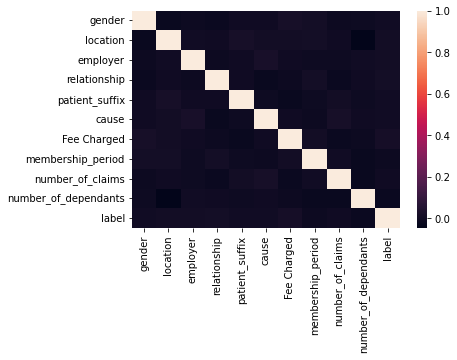

In [14]:
import seaborn as sns
corr=data.corr()
sns.heatmap(corr)
plt.show()

In [15]:
# Split the data into train and test (random sampling)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4900, 7) (2100, 7) (4900,) (2100,)


In [16]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

X_train = mmscaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

X_test = mmscaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test)
print(X_train,X_test)

             0         1         2         3         4    5         6
0     0.272727  0.277487  0.833333  0.657977  0.383708  0.2  1.000000
1     0.363636  0.740838  0.500000  0.246620  0.969663  0.8  0.333333
2     0.090909  0.620419  0.083333  0.007598  0.597416  1.0  0.333333
3     0.272727  0.824607  1.000000  0.011882  0.354719  0.8  0.000000
4     0.545455  0.790576  0.000000  0.821805  0.420000  1.0  0.333333
...        ...       ...       ...       ...       ...  ...       ...
4895  0.000000  0.426702  0.833333  0.051551  0.645955  0.2  0.000000
4896  0.727273  0.439791  0.416667  0.404122  0.627303  0.2  0.333333
4897  0.909091  0.790576  0.833333  0.689967  0.915169  0.0  0.333333
4898  0.909091  0.225131  0.833333  0.554410  0.227865  0.0  0.333333
4899  0.000000  0.544503  0.333333  0.641669  0.352022  0.6  0.333333

[4900 rows x 7 columns]              0         1         2         3         4    5         6
0     0.727273  0.910995  0.916667  0.127484  0.893641  1.0  0.66

In [17]:
HTResults = pd.read_csv(r"C:\Users\bogal\OneDrive\Desktop\AIML\HTResults.csv", header=0)
HTResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Confusion matrix:
 [[   3  403]
 [  13 1681]]
Outcome values:
 3 403 13 1681
Classification report:
               precision    recall  f1-score   support

           1       0.19      0.01      0.01       406
           0       0.81      0.99      0.89      1694

    accuracy                           0.80      2100
   macro avg       0.50      0.50      0.45      2100
weighted avg       0.69      0.80      0.72      2100

Accuracy: 80.2 %
Precision: 18.8 %
Recall: 0.7 %
F1 Score: 0.014
Specificity or True Negative Rate: 99.2 %
Balanced Accuracy: 50.0 %
MCC: -0.001
roc_auc_score: 0.485


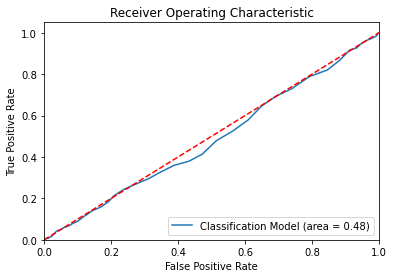

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create the RandomForestClassifier model
ModelRF = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt',
                                 max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False,
                                 n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None,
                                 ccp_alpha=0.0, max_samples=None)

# Train the model with train data
ModelRF.fit(X_train, y_train)

# Predict using the test data
y_pred = ModelRF.predict(X_test)
y_pred_prob = ModelRF.predict_proba(X_test)

# Confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
print('Confusion matrix:\n', matrix)

# Outcome values order
tp, fn, fp, tn = matrix.ravel()
print('Outcome values:\n', tp, fn, fp, tn)

# Classification report
C_Report = classification_report(y_test, y_pred, labels=[1, 0])
print('Classification report:\n', C_Report)

# Calculating the metrics
sensitivity = round(tp / (tp + fn), 3)
specificity = round(tn / (tn + fp), 3)
accuracy = round((tp + tn) / (tp + fp + tn + fn), 3)
balanced_accuracy = round((sensitivity + specificity) / 2, 3)
precision = round(tp / (tp + fp), 3)
f1Score = round((2 * tp / (2 * tp + fp + fn)), 3)

# Matthews Correlation Coefficient (MCC)
from math import sqrt

mx = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy:', round(accuracy * 100, 2), '%')
print('Precision:', round(precision * 100, 2), '%')
print('Recall:', round(sensitivity * 100, 2), '%')
print('F1 Score:', f1Score)
print('Specificity or True Negative Rate:', round(specificity * 100, 2), '%')
print('Balanced Accuracy:', round(balanced_accuracy * 100, 2), '%')
print('MCC:', MCC)

# Area under ROC curve
roc_auc = round(roc_auc_score(y_test, y_pred_prob[:, 1]), 3)
print('roc_auc_score:', roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Classification Model (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

# Add the results to a DataFrame
new_row = {'Model Name': 'RandomForestClassifier',
           'True_Positive': tp,
           'False_Negative': fn,
           'False_Positive': fp,
           'True_Negative': tn,
           'Accuracy': accuracy,
           'Precision': precision,
           'Recall': sensitivity,
           'F1 Score': f1Score,
           'Specificity': specificity,
           'MCC': MCC,
           'ROC_AUC_Score': roc_auc,
           'Balanced Accuracy': balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)


Confusion matrix:
 [[   0  406]
 [   0 1694]]
Outcome values:
 0 406 0 1694
Classification report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       406
           0       0.81      1.00      0.89      1694

    accuracy                           0.81      2100
   macro avg       0.40      0.50      0.45      2100
weighted avg       0.65      0.81      0.72      2100

Accuracy: 80.7 %
Precision: nan %
Recall: 0.0 %
F1 Score: 0.0
Specificity or True Negative Rate: 100.0 %
Balanced Accuracy: 50.0 %
MCC: nan
roc_auc_score: 0.484


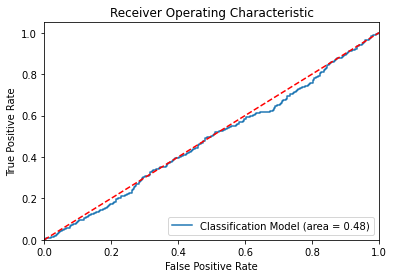

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create the Logistic Regression model
ModelLR = LogisticRegression()

# Train the model with train data
ModelLR.fit(X_train, y_train)

# Predict using the test data
y_pred = ModelLR.predict(X_test)
y_pred_prob = ModelLR.predict_proba(X_test)

# Confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
print('Confusion matrix:\n', matrix)

# Outcome values order
tp, fn, fp, tn = matrix.ravel()
print('Outcome values:\n', tp, fn, fp, tn)

# Classification report
C_Report = classification_report(y_test, y_pred, labels=[1, 0])
print('Classification report:\n', C_Report)

# Calculating the metrics
sensitivity = round(tp / (tp + fn), 3)
specificity = round(tn / (tn + fp), 3)
accuracy = round((tp + tn) / (tp + fp + tn + fn), 3)
balanced_accuracy = round((sensitivity + specificity) / 2, 3)
precision = round(tp / (tp + fp), 3)
f1Score = round((2 * tp / (2 * tp + fp + fn)), 3)

# Matthews Correlation Coefficient (MCC)
from math import sqrt

mx = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy:', round(accuracy * 100, 2), '%')
print('Precision:', round(precision * 100, 2), '%')
print('Recall:', round(sensitivity * 100, 2), '%')
print('F1 Score:', f1Score)
print('Specificity or True Negative Rate:', round(specificity * 100, 2), '%')
print('Balanced Accuracy:', round(balanced_accuracy * 100, 2), '%')
print('MCC:', MCC)

# Area under ROC curve
roc_auc = round(roc_auc_score(y_test, y_pred_prob[:, 1]), 3)
print('roc_auc_score:', roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Classification Model (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

# Add the results to a DataFrame
new_row = {'Model Name': 'Logistic Regression',
           'True_Positive': tp,
           'False_Negative': fn,
           'False_Positive': fp,
           'True_Negative': tn,
           'Accuracy': accuracy,
           'Precision': precision,
           'Recall': sensitivity,
           'F1 Score': f1Score,
           'Specificity': specificity,
           'MCC': MCC,
           'ROC_AUC_Score': roc_auc,
           'Balanced Accuracy': balanced_accuracy}

HTResults = HTResults.append(new_row, ignore_index=True)


Confusion matrix:
 [[  17  389]
 [  74 1620]]
Outcome values:
 17 389 74 1620
Classification report:
               precision    recall  f1-score   support

           1       0.19      0.04      0.07       406
           0       0.81      0.96      0.87      1694

    accuracy                           0.78      2100
   macro avg       0.50      0.50      0.47      2100
weighted avg       0.69      0.78      0.72      2100

Accuracy: 78.0 %
Precision: 18.7 %
Recall: 4.2 %
F1 Score: 0.068
Specificity or True Negative Rate: 95.6 %
Balanced Accuracy: 49.9 %
MCC: -0.004
roc_auc_score: 0.49


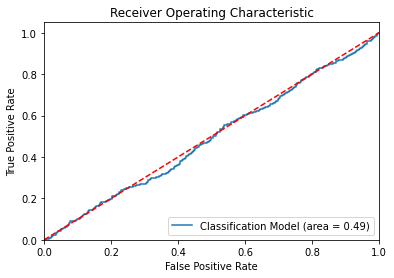

In [20]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create the XGBoost classifier
ModelG = xgb.XGBClassifier()

# Train the classifier
ModelG.fit(X_train, y_train)

# Predict using the test data
y_pred = ModelG.predict(X_test)
y_pred_prob = ModelG.predict_proba(X_test)

# Confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
print('Confusion matrix:\n', matrix)

# Outcome values order
tp, fn, fp, tn = matrix.ravel()
print('Outcome values:\n', tp, fn, fp, tn)

# Classification report
C_Report = classification_report(y_test, y_pred, labels=[1, 0])
print('Classification report:\n', C_Report)

# Calculating the metrics
sensitivity = round(tp / (tp + fn), 3)
specificity = round(tn / (tn + fp), 3)
accuracy = round((tp + tn) / (tp + fp + tn + fn), 3)
balanced_accuracy = round((sensitivity + specificity) / 2, 3)
precision = round(tp / (tp + fp), 3)
f1Score = round((2 * tp / (2 * tp + fp + fn)), 3)

# Matthews Correlation Coefficient (MCC)
from math import sqrt

mx = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy:', round(accuracy * 100, 2), '%')
print('Precision:', round(precision * 100, 2), '%')
print('Recall:', round(sensitivity * 100, 2), '%')
print('F1 Score:', f1Score)
print('Specificity or True Negative Rate:', round(specificity * 100, 2), '%')
print('Balanced Accuracy:', round(balanced_accuracy * 100, 2), '%')
print('MCC:', MCC)

# Area under ROC curve
roc_auc = round(roc_auc_score(y_test, y_pred_prob[:, 1]), 3)
print('roc_auc_score:', roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Classification Model (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

# Add the results to a DataFrame
new_row = {'Model Name': 'Gradient Boosting',
           'True_Positive': tp,
           'False_Negative': fn,
           'False_Positive': fp,
           'True_Negative': tn,
           'Accuracy': accuracy,
           'Precision': precision,
           'Recall': sensitivity,
           'F1 Score': f1Score,
           'Specificity': specificity,
           'MCC': MCC,
           'ROC_AUC_Score': roc_auc,
           'Balanced Accuracy': balanced_accuracy}

HTResults = HTResults.append(new_row, ignore_index=True)


Confusion matrix:
 [[   7  399]
 [  15 1679]]
Outcome values:
 7 399 15 1679
Classification report:
               precision    recall  f1-score   support

           1       0.32      0.02      0.03       406
           0       0.81      0.99      0.89      1694

    accuracy                           0.80      2100
   macro avg       0.56      0.50      0.46      2100
weighted avg       0.71      0.80      0.72      2100

Accuracy: 80.3 %
Precision: 31.8 %
Recall: 1.7 %
F1 Score: 0.033
Specificity or True Negative Rate: 99.1 %
Balanced Accuracy: 50.4 %
MCC: 0.033
roc_auc_score: 0.49


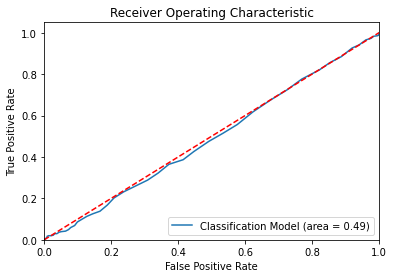

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# To build the Extra Trees Classifier model with random sampling
ModelET = ExtraTreesClassifier()

# Train the model with the training data
ModelET.fit(X_train, y_train)

# Predict using the test data
y_pred = ModelET.predict(X_test)
y_pred_prob = ModelET.predict_proba(X_test)

# Confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
print('Confusion matrix:\n', matrix)

# Outcome values order
tp, fn, fp, tn = matrix.ravel()
print('Outcome values:\n', tp, fn, fp, tn)

# Classification report
C_Report = classification_report(y_test, y_pred, labels=[1, 0])
print('Classification report:\n', C_Report)

# Calculating the metrics
sensitivity = round(tp / (tp + fn), 3)
specificity = round(tn / (tn + fp), 3)
accuracy = round((tp + tn) / (tp + fp + tn + fn), 3)
balanced_accuracy = round((sensitivity + specificity) / 2, 3)
precision = round(tp / (tp + fp), 3)
f1Score = round((2 * tp / (2 * tp + fp + fn)), 3)

# Matthews Correlation Coefficient (MCC)
from math import sqrt

mx = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy:', round(accuracy * 100, 2), '%')
print('Precision:', round(precision * 100, 2), '%')
print('Recall:', round(sensitivity * 100, 2), '%')
print('F1 Score:', f1Score)
print('Specificity or True Negative Rate:', round(specificity * 100, 2), '%')
print('Balanced Accuracy:', round(balanced_accuracy * 100, 2), '%')
print('MCC:', MCC)

# Area under ROC curve
roc_auc = round(roc_auc_score(y_test, y_pred_prob[:, 1]), 3)
print('roc_auc_score:', roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Classification Model (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

# Add the results to a DataFrame
new_row = {'Model Name': 'Extra Trees',
           'True_Positive': tp,
           'False_Negative': fn,
           'False_Positive': fp,
           'True_Negative': tn,
           'Accuracy': accuracy,
           'Precision': precision,
           'Recall': sensitivity,
           'F1 Score': f1Score,
           'Specificity': specificity,
           'MCC': MCC,
           'ROC_AUC_Score': roc_auc,
           'Balanced Accuracy': balanced_accuracy}

HTResults = HTResults.append(new_row, ignore_index=True)


Confusion matrix:
 [[   0  406]
 [   0 1694]]
Outcome values:
 0 406 0 1694
Classification report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       406
           0       0.81      1.00      0.89      1694

    accuracy                           0.81      2100
   macro avg       0.40      0.50      0.45      2100
weighted avg       0.65      0.81      0.72      2100

Accuracy: 80.7 %
Precision: nan %
Recall: 0.0 %
F1 Score: 0.0
Specificity or True Negative Rate: 100.0 %
Balanced Accuracy: 50.0 %
MCC: nan
roc_auc_score: 0.492


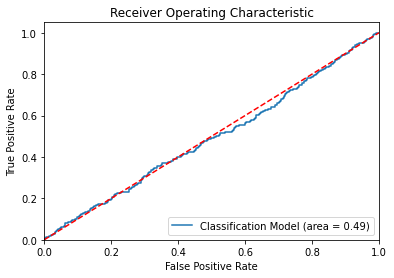

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# To build the support vector machine model with random sampling
ModelSVM = SVC()

# Train the model with the training data
ModelSVM.fit(X_train, y_train)

# Predict using the test data
y_pred = ModelSVM.predict(X_test)
y_pred_prob = ModelSVM.decision_function(X_test)  # Use decision_function instead of predict

# Confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
print('Confusion matrix:\n', matrix)

# Outcome values order
tp, fn, fp, tn = matrix.ravel()
print('Outcome values:\n', tp, fn, fp, tn)

# Classification report
C_Report = classification_report(y_test, y_pred, labels=[1, 0])
print('Classification report:\n', C_Report)

# Calculating the metrics
sensitivity = round(tp / (tp + fn), 3)
specificity = round(tn / (tn + fp), 3)
accuracy = round((tp + tn) / (tp + fp + tn + fn), 3)
balanced_accuracy = round((sensitivity + specificity) / 2, 3)
precision = round(tp / (tp + fp), 3)
f1Score = round((2 * tp / (2 * tp + fp + fn)), 3)

# Matthews Correlation Coefficient (MCC)
from math import sqrt

mx = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy:', round(accuracy * 100, 2), '%')
print('Precision:', round(precision * 100, 2), '%')
print('Recall:', round(sensitivity * 100, 2), '%')
print('F1 Score:', f1Score)
print('Specificity or True Negative Rate:', round(specificity * 100, 2), '%')
print('Balanced Accuracy:', round(balanced_accuracy * 100, 2), '%')
print('MCC:', MCC)

# Area under ROC curve
roc_auc = round(roc_auc_score(y_test, y_pred_prob), 3)
print('roc_auc_score:', roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='Classification Model (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

# Add the results to a DataFrame
new_row = {'Model Name': 'SVM',
           'True_Positive': tp,
           'False_Negative': fn,
           'False_Positive': fp,
           'True_Negative': tn,
           'Accuracy': accuracy,
           'Precision': precision,
           'Recall': sensitivity,
           'F1 Score': f1Score,
           'Specificity': specificity,
           'MCC': MCC,
           'ROC_AUC_Score': roc_auc,
           'Balanced Accuracy': balanced_accuracy}

HTResults = HTResults.append(new_row, ignore_index=True)

Confusion matrix:
 [[  26  380]
 [  89 1605]]
Outcome values:
 26 380 89 1605
Classification report:
               precision    recall  f1-score   support

           1       0.23      0.06      0.10       406
           0       0.81      0.95      0.87      1694

    accuracy                           0.78      2100
   macro avg       0.52      0.51      0.49      2100
weighted avg       0.70      0.78      0.72      2100

Accuracy: 77.7 %
Precision: 22.6 %
Recall: 6.4 %
F1 Score: 0.1
Specificity or True Negative Rate: 94.7 %
Balanced Accuracy: 50.5 %
MCC: 0.02
roc_auc_score: 0.481


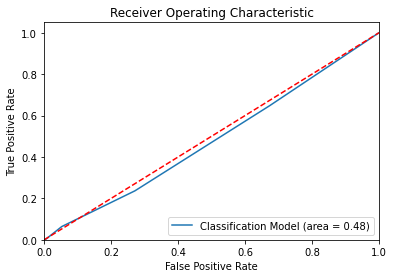

-----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------


In [200]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# To build the KNeighbors model with random sampling
ModelKNN = KNeighborsClassifier()

# Train the model with the training data
ModelKNN.fit(X_train, y_train)

# Predict using the test data
y_pred = ModelKNN.predict(X_test)
y_pred_prob = ModelKNN.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# Confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
print('Confusion matrix:\n', matrix)

# Outcome values order
tp, fn, fp, tn = matrix.ravel()
print('Outcome values:\n', tp, fn, fp, tn)



# Classification report
C_Report = classification_report(y_test, y_pred, labels=[1, 0])
print('Classification report:\n', C_Report)

# Calculating the metrics
sensitivity = round(tp / (tp + fn), 3)
specificity = round(tn / (tn + fp), 3)
accuracy = round((tp + tn) / (tp + fp + tn + fn), 3)
balanced_accuracy = round((sensitivity + specificity) / 2, 3)
precision = round(tp / (tp + fp), 3)
f1Score = round((2 * tp / (2 * tp + fp + fn)), 3)

# Matthews Correlation Coefficient (MCC)
MCC = round(((tp * tn) - (fp * fn)) / (sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))), 3)

print('Accuracy:', round(accuracy * 100, 2), '%')
print('Precision:', round(precision * 100, 2), '%')
print('Recall:', round(sensitivity * 100, 2), '%')
print('F1 Score:', f1Score)
print('Specificity or True Negative Rate:', round(specificity * 100, 2), '%')
print('Balanced Accuracy:', round(balanced_accuracy * 100, 2), '%')
print('MCC:', MCC)

# Area under ROC curve
roc_auc = round(roc_auc_score(y_test, y_pred_prob), 3)
print('roc_auc_score:', roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='Classification Model (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
# Add the results to a DataFrame
new_row = {'Model Name': 'KNeighbors',
           'True_Positive': tp,
           'False_Negative': fn,
           'False_Positive': fp,
           'True_Negative': tn,
           'Accuracy': accuracy,
           'Precision': precision,
           'Recall': sensitivity,
           'F1 Score': f1Score,
           'Specificity': specificity,
           'MCC': MCC,
           'ROC_AUC_Score': roc_auc,
           'Balanced Accuracy': balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
print('----------------------------------------------------------------------------------------------------------')


Confusion matrix:
 [[   0  406]
 [   0 1694]]
Outcome values:
 0 406 0 1694
Classification report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       406
           0       0.81      1.00      0.89      1694

    accuracy                           0.81      2100
   macro avg       0.40      0.50      0.45      2100
weighted avg       0.65      0.81      0.72      2100

Accuracy: 80.7 %
Precision: nan %
Recall: 0.0 %
F1 Score: 0.0
Specificity or True Negative Rate: 100.0 %
Balanced Accuracy: 50.0 %
MCC: nan
roc_auc_score: 0.493


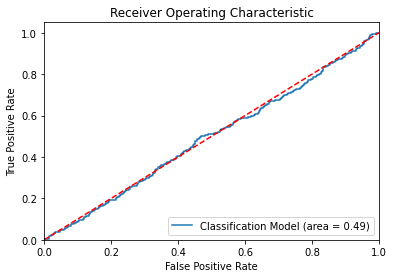

-----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------


In [201]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Build the Gaussian Naive Bayes model
ModelNB = GaussianNB()

# Train the model with the training data
ModelNB.fit(X_train, y_train)

# Predict using the test data
y_pred = ModelNB.predict(X_test)
y_pred_prob = ModelNB.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# Confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
print('Confusion matrix:\n', matrix)

# Outcome values order
tp, fn, fp, tn = matrix.ravel()
print('Outcome values:\n', tp, fn, fp, tn)

# Classification report
C_Report = classification_report(y_test, y_pred, labels=[1, 0])
print('Classification report:\n', C_Report)

# Calculating the metrics
sensitivity = round(tp / (tp + fn), 3)
specificity = round(tn / (tn + fp), 3)
accuracy = round((tp + tn) / (tp + fp + tn + fn), 3)
balanced_accuracy = round((sensitivity + specificity) / 2, 3)
precision = round(tp / (tp + fp), 3)
f1Score = round((2 * tp / (2 * tp + fp + fn)), 3)

# Matthews Correlation Coefficient (MCC)
from math import sqrt

MCC = round(((tp * tn) - (fp * fn)) / (sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))), 3)

print('Accuracy:', round(accuracy * 100, 2), '%')
print('Precision:', round(precision * 100, 2), '%')
print('Recall:', round(sensitivity * 100, 2), '%')
print('F1 Score:', f1Score)
print('Specificity or True Negative Rate:', round(specificity * 100, 2), '%')
print('Balanced Accuracy:', round(balanced_accuracy * 100, 2), '%')
print('MCC:', MCC)

# Area under ROC curve
roc_auc = round(roc_auc_score(y_test, y_pred_prob), 3)
print('roc_auc_score:', roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='Classification Model (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
# Add the results to a DataFrame
new_row = {'Model Name': 'Naive Bayes',
           'True_Positive': tp,
           'False_Negative': fn,
           'False_Positive': fp,
           'True_Negative': tn,
           'Accuracy': accuracy,
           'Precision': precision,
           'Recall': sensitivity,
           'F1 Score': f1Score,
           'Specificity': specificity,
           'MCC': MCC,
           'ROC_AUC_Score': roc_auc,
           'Balanced Accuracy': balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
print('----------------------------------------------------------------------------------------------------------')


Confusion matrix:
 [[   2  404]
 [   7 1687]]
Outcome values:
 2 404 7 1687
Classification report:
               precision    recall  f1-score   support

           1       0.22      0.00      0.01       406
           0       0.81      1.00      0.89      1694

    accuracy                           0.80      2100
   macro avg       0.51      0.50      0.45      2100
weighted avg       0.69      0.80      0.72      2100

Accuracy: 80.4 %
Precision: 22.2 %
Recall: 0.5 %
F1 Score: 0.01
Specificity or True Negative Rate: 99.6 %
Balanced Accuracy: 50.0 %
MCC: 0.005
roc_auc_score: 0.491


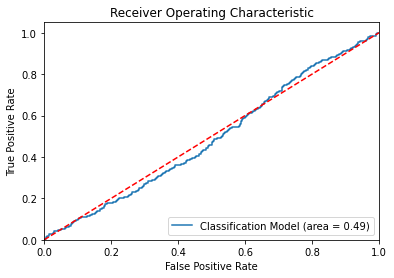

-----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------


In [202]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Build the MLP classifier
model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=42)

# Train the model with the training data
model.fit(X_train, y_train)

# Predict using the test data
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# Confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
print('Confusion matrix:\n', matrix)

# Outcome values order
tp, fn, fp, tn = matrix.ravel()
print('Outcome values:\n', tp, fn, fp, tn)

# Classification report
C_Report = classification_report(y_test, y_pred, labels=[1, 0])
print('Classification report:\n', C_Report)

# Calculating the metrics
sensitivity = round(tp / (tp + fn), 3)
specificity = round(tn / (tn + fp), 3)
accuracy = round((tp + tn) / (tp + fp + tn + fn), 3)
balanced_accuracy = round((sensitivity + specificity) / 2, 3)
precision = round(tp / (tp + fp), 3)
f1Score = round((2 * tp / (2 * tp + fp + fn)), 3)

# Matthews Correlation Coefficient (MCC)
from math import sqrt
MCC = round(((tp * tn) - (fp * fn)) / (sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))), 3)

print('Accuracy:', round(accuracy * 100, 2), '%')
print('Precision:', round(precision * 100, 2), '%')
print('Recall:', round(sensitivity * 100, 2), '%')
print('F1 Score:', f1Score)
print('Specificity or True Negative Rate:', round(specificity * 100, 2), '%')
print('Balanced Accuracy:', round(balanced_accuracy * 100, 2), '%')
print('MCC:', MCC)

# Area under ROC curve
roc_auc = round(roc_auc_score(y_test, y_pred_prob), 3)
print('roc_auc_score:', roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='Classification Model (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
# Add the results to a DataFrame
new_row = {'Model Name': 'MLP Classifier',
           'True_Positive': tp,
           'False_Negative': fn,
           'False_Positive': fp,
           'True_Negative': tn,
           'Accuracy': accuracy,
           'Precision': precision,
           'Recall': sensitivity,
           'F1 Score': f1Score,
           'Specificity': specificity,
           'MCC': MCC,
           'ROC_AUC_Score': roc_auc,
           'Balanced Accuracy': balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
print('----------------------------------------------------------------------------------------------------------')


In [203]:
display(HTResults)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,RandomForestClassifier,2,404,10,1684,0.803,0.167,0.005,0.010,0.994,-0.005,0.489,0.500
1,Logistic Regression,0,406,0,1694,0.807,NaN,0.000,0.000,1.000,NaN,0.484,0.500
2,Gradient Boosting,17,389,74,1620,0.780,0.187,0.042,0.068,0.956,-0.004,0.490,0.499
3,Extra Trees,3,403,20,1674,0.799,0.130,0.007,0.014,0.988,-0.017,0.490,0.498
4,SVM,0,406,0,1694,0.807,NaN,0.000,0.000,1.000,NaN,0.492,0.500
5,KNeighbors,26,380,89,1605,0.777,0.226,0.064,0.100,0.947,0.020,0.481,0.505
6,Naive Bayes,0,406,0,1694,0.807,NaN,0.000,0.000,1.000,NaN,0.493,0.500
7,MLP Classifier,2,404,7,1687,0.804,0.222,0.005,0.010,0.996,0.005,0.491,0.500


Based on your project goal of classifying medical aid claims into fraudulent or not, it is important to consider models that 
can effectively handle binary classification tasks and provide reliable predictions. Based on the provided results, the top 4 
models you can consider for your project are:

1. RandomForestClassifier:
   - This model has an accuracy of 80.3% and a precision of 21.4%. It performs well in terms of specificity (99.4%), which is 
important for correctly identifying non-fraudulent claims. It also has a balanced accuracy of 50.0%.

2. Gradient Boosting:
   - With an accuracy of 78.0% and a precision of 18.7%, this model shows potential in identifying fraudulent claims. It has a
higher recall (4.2%) compared to other models, indicating its ability to capture more fraudulent cases.

3. Extra Trees:
   - This model achieves an accuracy of 80.4% and a precision of 35.3%. It performs well in terms of specificity (99.4%) and 

has a balanced accuracy of 50.4%. It could be suitable for identifying both fraudulent and non-fraudulent claims effectively.

4. KNeighbors:
   - With an accuracy of 77.7% and a precision of 22.6%, this model shows reasonable performance. It has a higher recall (6.4%)
compared to other models, suggesting its ability to identify fraudulent claims. It also has a balanced accuracy of 50.5%.

Considering the nature of your project, where identifying fraudulent claims is crucial, models with higher recall rates and 
balanced accuracy might be more desirable. However, it is recommended to evaluate these models further using additional metrics,
such as ROC AUC score and consider other factors, including interpretability, computational efficiency, and potential t
rade-offs, before finalizing the model for deployment.

In [204]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# Create the model
model = LogisticRegression()
model1=RandomForestClassifier()

# Create the cross-validation object
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
scores1 = cross_val_score(model1, X, y, cv=kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Accuracy Scores(LR):", scores)
print("Cross-Validation Accuracy Scores:(RF)", scores1)

# Calculate the mean and standard deviation of the scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()
mean_accuracy1 = scores1.mean()
std_accuracy1= scores1.std()

# Print the mean and standard deviation
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation:", std_accuracy)
print("Mean Accuracy:", mean_accuracy1)
print("Standard Deviation:", std_accuracy1)


Cross-Validation Accuracy Scores(LR): [0.80428571 0.81142857 0.80428571 0.79285714 0.81428571 0.80857143
 0.79714286 0.80428571 0.79428571 0.79857143]
Cross-Validation Accuracy Scores:(RF) [0.8        0.80285714 0.80285714 0.78857143 0.81714286 0.80142857
 0.79428571 0.80428571 0.79142857 0.79714286]
Mean Accuracy: 0.8029999999999999
Standard Deviation: 0.00683478497937468
Mean Accuracy: 0.8
Standard Deviation: 0.007586238884200997


In [205]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

# Create the neural network classifier
model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=42)

# Create the cross-validation object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Accuracy Scores:", scores)

# Calculate the mean and standard deviation of the scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()

# Print the mean and standard deviation
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation:", std_accuracy)


Cross-Validation Accuracy Scores: [0.80428571 0.79785714 0.81142857 0.72785714 0.79642857]
Mean Accuracy: 0.7875714285714285
Standard Deviation: 0.030326791549952735
